In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load  Dataset

In [59]:
from sklearn import datasets
Iris = datasets.load_iris()

In [60]:
# These are the images
Iris.data.shape

(150, 4)

In [61]:
X = Iris.data
y = Iris.target

Split Data into Training and Test Sets

In [62]:
from sklearn.model_selection import train_test_split
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Standardize the Data

In [63]:
from sklearn.preprocessing import StandardScaler
#object
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

Import and Apply PCA

In [64]:
from sklearn.decomposition import PCA
# Make an instance of the Model
#to know how many minimum number of principal components would be needed

pca = PCA()


In [65]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [66]:
pca.get_covariance()

array([[ 1.00840336, -0.06107506,  0.88313486,  0.83511036],
       [-0.06107506,  1.00840336, -0.38078264, -0.3285196 ],
       [ 0.88313486, -0.38078264,  1.00840336,  0.97632992],
       [ 0.83511036, -0.3285196 ,  0.97632992,  1.00840336]])

In [67]:
explained_variance=pca.explained_variance_ratio_
explained_variance
#this shows that the first two features when arranged in descending order contribute to more than 
#90% of the total variance by the features.

array([0.72229951, 0.2397406 , 0.03335483, 0.00460506])

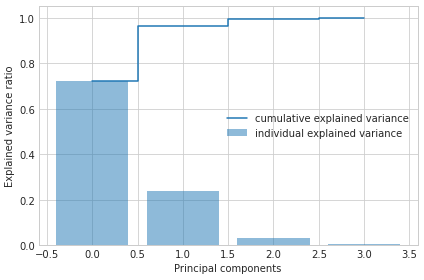

In [68]:
cum_var_exp = np.cumsum(explained_variance)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [69]:
#therefore choosing the minimum number of principal components such that 90% of the variance is retained
pca_final = PCA(0.9)
pca_final.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
eigen_vals = pca_final.explained_variance_
eigen_vals 

array([2.91347703, 0.9670209 ])

In [71]:
X_train_pca = pca_final.transform(X_train)
X_test_pca= pca_final.transform(X_test)

In [72]:
print(pca_final.n_components_)

2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


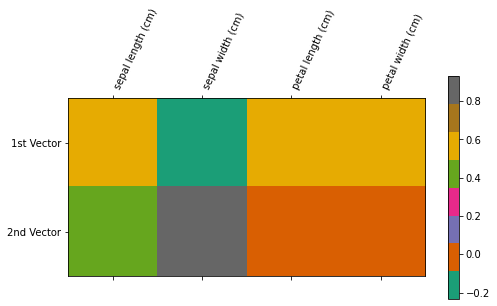

In [73]:
plt.matshow(pca_final.components_,cmap = 'Dark2')
plt.yticks([0,1],['1st Vector','2nd Vector'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(Iris.feature_names)),Iris.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()

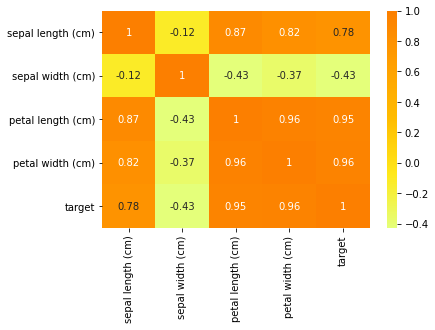

In [74]:
df = pd.DataFrame(data= np.c_[Iris['data'], Iris['target']],
                     columns= Iris['feature_names'] + ['target'])
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

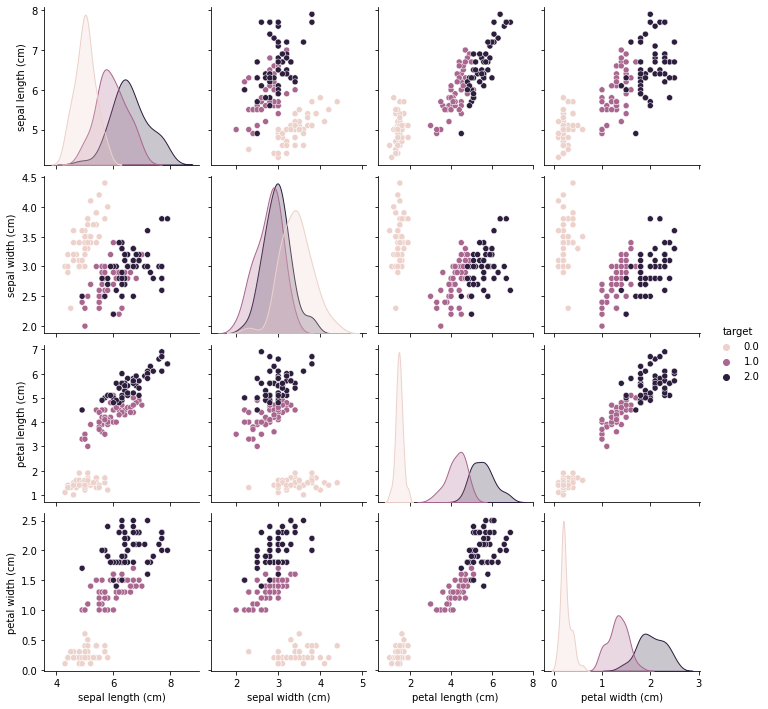

In [98]:
sns.pairplot(data=df,hue="target")

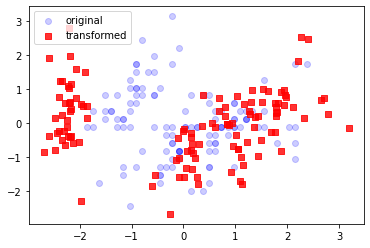

In [75]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_train[:, 0], X_train[:, 1], alpha=0.2, c='b', marker="o", label='original')
ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.8, c='r', marker="s", label='transformed')
plt.legend(loc='upper left');
plt.show()

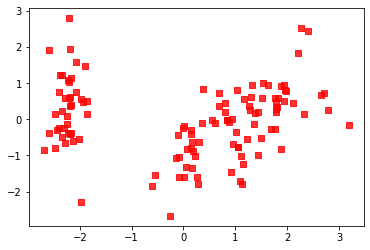

In [76]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.8, c='r', marker="s", label='transformed')

#PCA and LDA comparison

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

X_pca = pca_final.transform(X)
X_lda = lda.transform(X)

In [78]:
lda_comp= LinearDiscriminantAnalysis(n_components=4)
lda_comp.fit(X_train, y_train)
lda_comp.explained_variance_ratio_


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


array([0.9911804, 0.0088196])

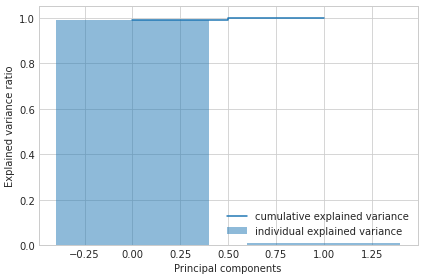

In [79]:
cum_var_exp_comp = np.cumsum(lda_comp.explained_variance_ratio_)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(2),lda_comp.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(2), cum_var_exp_comp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

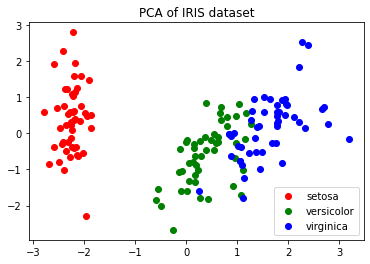

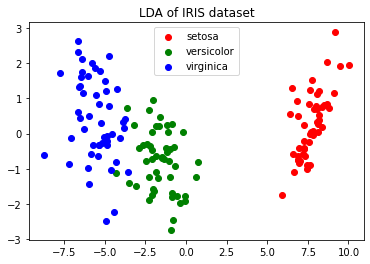

In [80]:
target_names = Iris.target_names
plt.figure()
colors = ['r', 'g', 'b']
lw = 2

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
   plt.scatter(X_pca[y==i,0], X_pca[y==i,1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
   plt.scatter(X_lda[y==i,0], X_lda[y==i,1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')

plt.show()

Apply Bayes Classifier to the Transformed Data



In [81]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [82]:
from sklearn.naive_bayes import GaussianNB
clf_pca = GaussianNB()
clf_pca.fit(X_train_pca, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
y_pred_pca = clf_pca.predict(X_test_pca)

In [84]:
from sklearn.naive_bayes import GaussianNB
clf_lda = GaussianNB()
clf_lda.fit(X_train_lda, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
y_pred_lda = clf_lda.predict(X_test_lda)

Measuring Model Performances

In [86]:
clf.score(X_test, y_test)

0.9666666666666667

In [87]:
clf_pca.score(X_test_pca, y_test)

0.8666666666666667

In [88]:
clf_lda.score(X_test_lda, y_test)

1.0

Confusion Matrices

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [90]:
from sklearn.metrics import confusion_matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)
cm_pca

array([[11,  0,  0],
       [ 0, 11,  2],
       [ 0,  2,  4]])

In [91]:
cm_lda = confusion_matrix(y_test, y_pred_lda)
cm_lda

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Visualising test results

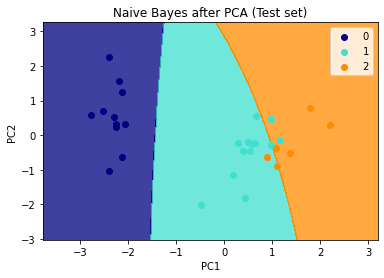

In [94]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navy', 'turquoise', 'darkorange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('navy', 'turquoise', 'darkorange'))(i), label = j)
plt.title('Naive Bayes after PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

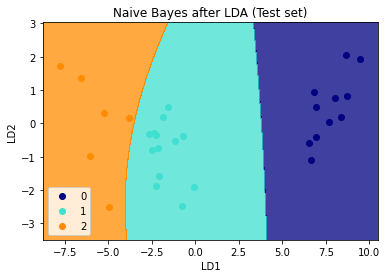

In [95]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_lda, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf_lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navy', 'turquoise', 'darkorange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('navy', 'turquoise', 'darkorange'))(i), label = j)
plt.title('Naive Bayes after LDA (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()